<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Training

**Self-Training**

Self-Training is a semi-supervised learning approach that leverages a small labeled dataset alongside a larger unlabeled dataset. The model is initially trained on labeled data, and then it makes predictions on the unlabeled data. The confident predictions (those with high certainty) are then added to the labeled dataset, and the process is repeated to improve the mode

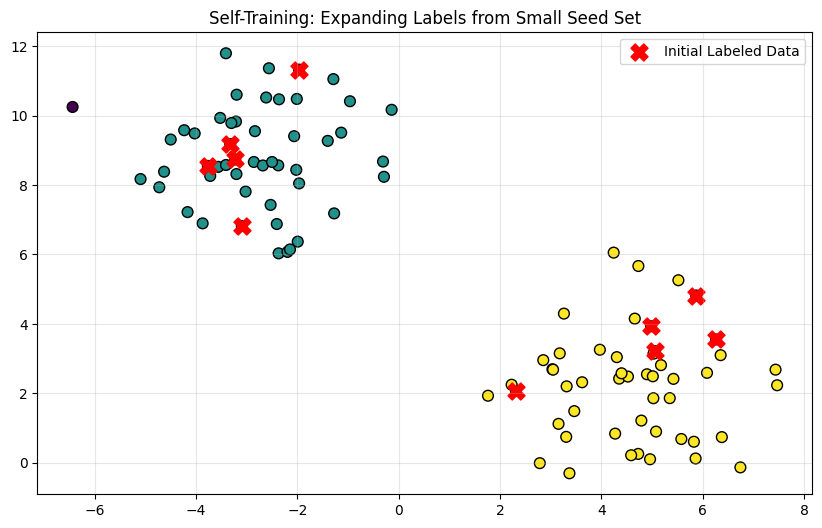

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# 1. Generate sample data
# We create 100 points, but "hide" labels for most of them (-1 means unlabeled)
X, y_true = make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=42)
y_labeled = np.copy(y_true)
y_labeled[10:] = -1  # Keep only 10 labels, make the other 90 unlabeled

# 2. Initialize the base estimator and Self-Training model
# We use a support vector machine (SVC) that can provide probabilities
base_svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(base_svc)

# 3. Fit the model
# The model learns from the 10 labels and iteratively labels the remaining 90
self_training_model.fit(X, y_labeled)

# Plotting Code
plt.figure(figsize=(10, 6))

# Plot the points the model successfully labeled
output_labels = self_training_model.transduction_
plt.scatter(X[:, 0], X[:, 1], c=output_labels, cmap='viridis', s=60, edgecolors='k')

# Highlight the original 10 labeled points with larger markers
plt.scatter(X[:10, 0], X[:10, 1], c='red', marker='X', s=150, label='Initial Labeled Data')

plt.title("Self-Training: Expanding Labels from Small Seed Set")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()